In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,8)})

### Normalizing the 3PT stats
Since 3PT volume is so closely related to the year of playing, it would be more informative to normalize that volume of 3PT shots to the specific year of playing.

In [50]:
data = pd.read_csv('../data/teams_processed.csv')
data.head()

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,ORB%,FT/FGA,OeFG%,OTOV%,DRB%,OFT/FGA,Arena,Attend.,Attend./G,Year
0,Los Angeles Lakers,27.2,53,29,48,34,2.72,-0.08,2.64,101.4,...,31.0,0.188,0.452,15.6,66.1,0.194,The Forum,501434.0,12535.850,1977
1,Boston Celtics,28.7,44,38,36,46,-1.98,0.08,-1.90,96.5,...,31.1,0.212,0.450,13.4,72.8,0.204,Boston Garden,517391.0,12934.775,1977
2,New Orleans Jazz,26.1,35,47,33,49,-2.82,0.13,-2.68,97.0,...,31.0,0.222,0.452,15.5,68.2,0.238,Louisiana Superdome,441320.0,11033.000,1977
3,Los Angeles Lakers,25.8,45,37,48,34,2.67,-0.08,2.59,103.3,...,30.4,0.205,0.463,15.2,66.0,0.194,The Forum,534017.0,13350.425,1978
4,Boston Celtics,29.7,32,50,36,46,-1.95,0.09,-1.86,99.1,...,32.4,0.220,0.456,13.9,71.4,0.226,Boston Garden,437937.0,10948.425,1978


#### Calculating 3PT Volume by Year

In [51]:
norm = data.groupby('Year').mean()
mean_table = dict(zip(norm.index, norm['3PAr']))

def normalize_3par(row):
  if mean_table[row['Year']] == 0:
    return 0
  else:
    return row['3PAr'] / mean_table[row['Year']]

data['3PAr_Norm'] = data.apply(normalize_3par, axis=1)
data.drop(data[data['3PAr'] == 0].index, inplace=True)

data.to_csv('../data/teams_normalized.csv')

### Evaluating Effectiveness of Normalization

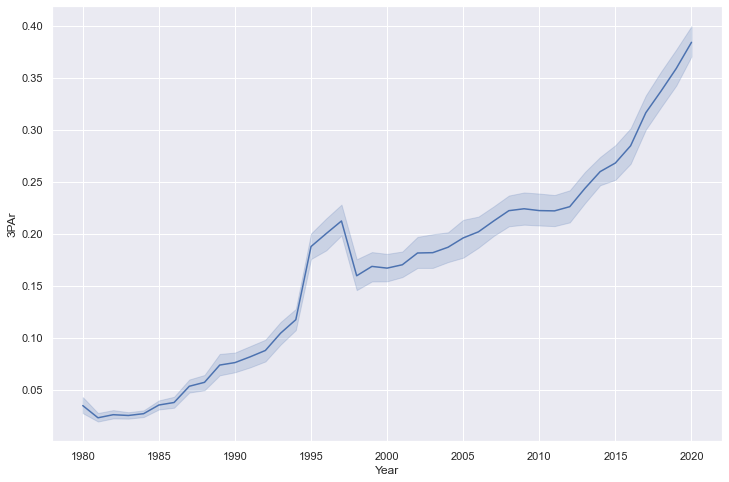

In [52]:
old = sns.lineplot(x='Year', y='3PAr', data=data)

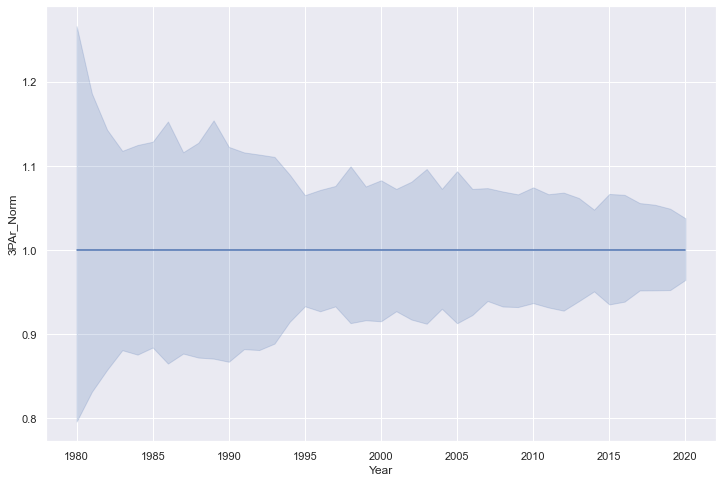

In [53]:
new = sns.lineplot(x='Year', y='3PAr_Norm', data=data)